In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim

In [2]:
df  = pd.read_csv("ds_salaries.csv")

In [3]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [4]:
df['company_size'].unique()

array(['L', 'S', 'M', 'M '], dtype=object)

In [5]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [6]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [7]:
df_Analyst = df[df['job_title'].str.contains('Analyst', case=False, na=False)]
df_Engineer = df[df['job_title'].str.contains('engineer|architec', case=False, na=False)]
df_Science = df[df['job_title'].str.contains('scientist|science|manager', case=False, na=False)]

In [8]:
df_Analyst

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
12,2023,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M
19,2023,MI,FT,Data Analyst,150000,USD,150000,US,100,US,M
20,2023,MI,FT,Data Analyst,110000,USD,110000,US,100,US,M
37,2023,MI,FT,Data Analyst,105380,USD,105380,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3724,2021,EN,FT,Business Data Analyst,50000,EUR,59102,LU,100,LU,L
3734,2021,MI,FT,Lead Data Analyst,1450000,INR,19609,IN,100,IN,L
3736,2021,MI,FT,Data Analyst,75000,USD,75000,US,0,US,L
3737,2021,MI,FT,Data Analyst,62000,USD,62000,US,0,US,L


In [9]:
df['work_year'].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [12]:
df_promedio_engin = df_Engineer.groupby('work_year')['salary_in_usd'].mean().reset_index()
df_promedio_engin.columns=['anioTrabajo','promedioSalario']
df_promedio_engin

,anioTrabajo,promedioSalario
0,2020,85916.259259
1,2021,94374.293478
2,2022,141101.704188
3,2023,156534.110209


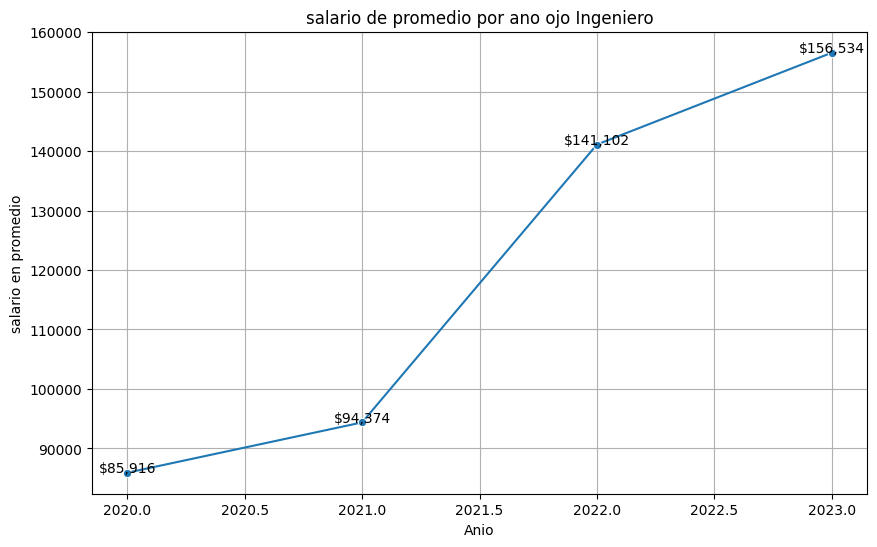

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='anioTrabajo', y='promedioSalario', data=df_promedio_engin, marker='o')

plt.title('salario de promedio por anio ojo Ingeniero')
plt.xlabel('Anio')
plt.ylabel('salario en promedio')

for i in range(len(df_promedio_engin)):
    plt.text(df_promedio_engin['anioTrabajo'][i], df_promedio_engin['promedioSalario'][i], 
             f"${df_promedio_engin['promedioSalario'][i]:,.0f}", ha='center')

plt.grid(True)
plt.show()

In [15]:
df_promedio_analy = df_Analyst.groupby('work_year')['salary_in_usd'].mean().reset_index()
df_promedio_analy.columns=['anioTrabajo','promedioSalario']
df_promedio_analy

,anioTrabajo,promedioSalario
0,2020,56107.000000
1,2021,77978.625000
2,2022,103922.498371
3,2023,111618.735562


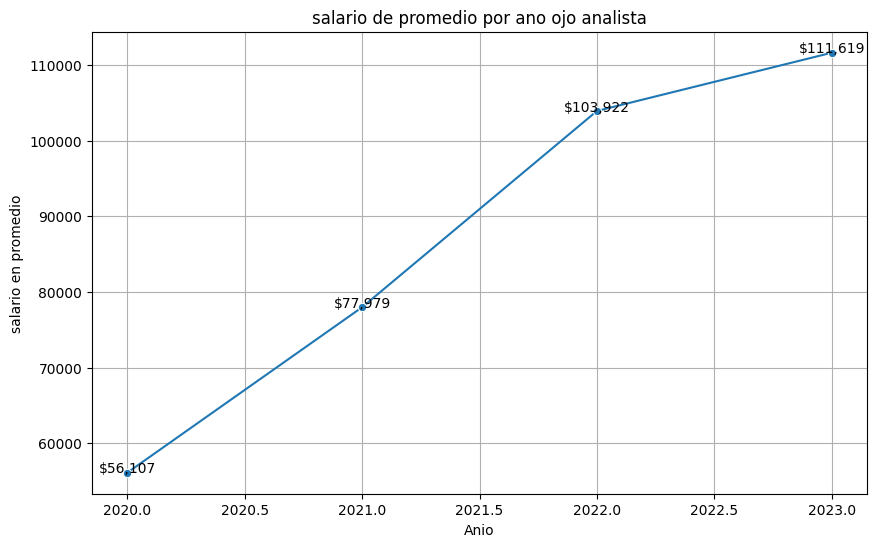

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='anioTrabajo', y='promedioSalario', data=df_promedio_analy, marker='o')

plt.title('salario de promedio por anio ojo analista')
plt.xlabel('Anio')
plt.ylabel('salario en promedio')

for i in range(len(df_promedio_analy)):
    plt.text(df_promedio_analy['anioTrabajo'][i], df_promedio_analy['promedioSalario'][i], 
             f"${df_promedio_analy['promedioSalario'][i]:,.0f}", ha='center')

plt.grid(True)
plt.show()

In [19]:
df_promedio_science = df_Science.groupby('work_year')['salary_in_usd'].mean().reset_index()
df_promedio_science.columns=['anioTrabajo','promedioSalario']
df_promedio_science

,anioTrabajo,promedioSalario
0,2020,115077.242424
1,2021,99035.765306
2,2022,139894.917431
3,2023,161150.662500


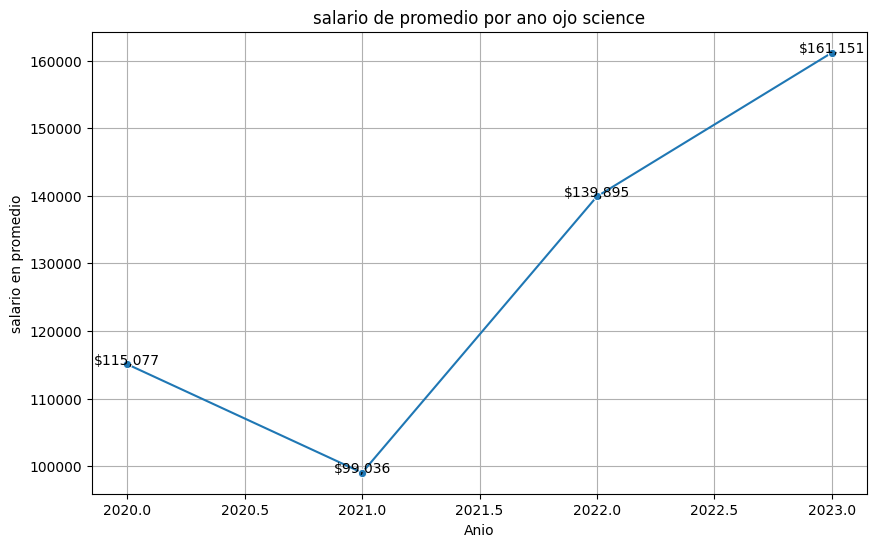

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='anioTrabajo', y='promedioSalario', data=df_promedio_science, marker='o')

plt.title('salario de promedio por ano ojo science')
plt.xlabel('Anio')
plt.ylabel('salario en promedio')

for i in range(len(df_promedio_science)):
    plt.text(df_promedio_science['anioTrabajo'][i], df_promedio_science['promedioSalario'][i], 
             f"${df_promedio_science['promedioSalario'][i]:,.0f}", ha='center')

plt.grid(True)
plt.show()

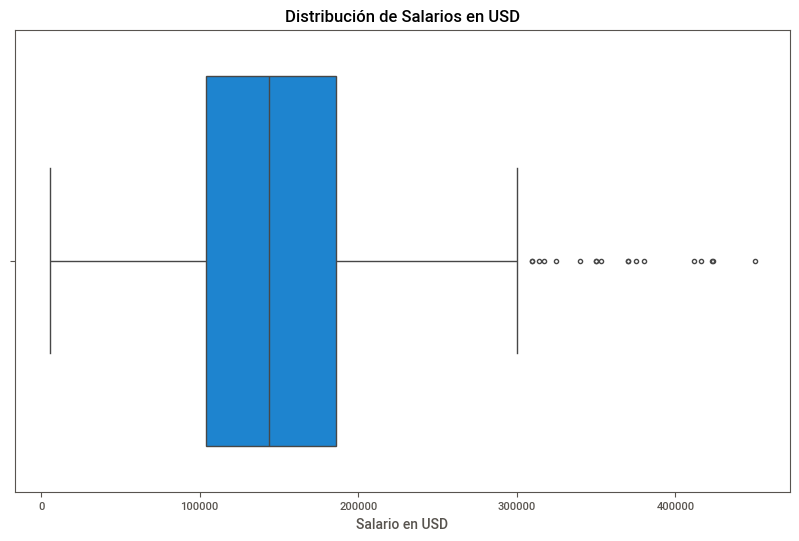

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', data=df_Science)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.show()

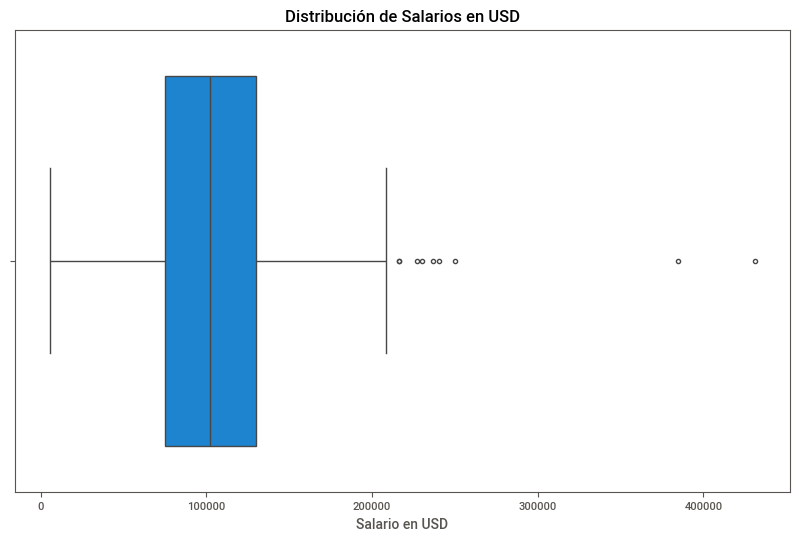

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', data=df_Analyst)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.show()

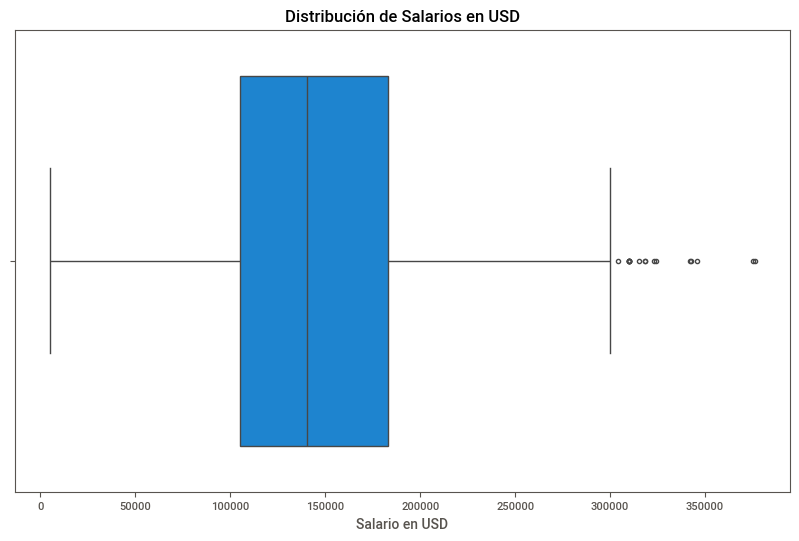

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary_in_usd', data=df_Engineer)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.show()

In [ ]:
df_Engineer

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
21,2023,SE,FT,Research Engineer,275000,USD,275000,DE,0,DE,M
22,2023,SE,FT,Research Engineer,174000,USD,174000,DE,0,DE,M
23,2023,SE,FT,Analytics Engineer,230000,USD,230000,GB,100,GB,M
...,...,...,...,...,...,...,...,...,...,...,...
3723,2021,SE,FT,Computer Vision Engineer,102000,BRL,18907,BR,0,BR,M
3739,2021,MI,FT,Data Engineer,38400,EUR,45391,NL,100,NL,L
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,100,HR,S


In [ ]:
df_Science

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3755   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p50     ┃ p75    ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ work_year       │   0 │     0 │    2000 │    0.69 │  2000 │    2000 │    2000 │   2000 │     2000 │   ▁ ▇▇ │  │
│ │ salary          │   0 │     0 │  190000 │  670000 │  6000 │  100000 │  140000 │ 180000 │ 30000000 │   ▇    │  │
│ │ salary_in_usd   │   0 │     0 │  140000 │   63000 │  5100 │   95000 │  140000 │ 180000 │   450000 │  ▃▇▅▁  │  │
│ │ remote_ratio    │   0 │     0 │      46 │      49 │     0 │       0 │       0 │    100 │      100 │ ▇  ▁ ▇ │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴───────┴─────────┴─────────┴────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                 3755 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                 3755 │  │
│ │ job_title                          │      0 │         0 │                       2.2 │                 8307 │  │
│ │ salary_currency                    │      0 │         0 │                         1 │                 3755 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                 3755 │  │
│ │ company_location                   │      0 │         0 │                         1 │                 3755 │  │
│ │ company_size                       │      0 │         0 │                         1 │                 3756 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Resumen 

**ds_salaries.csv**

- tamaño de la muestra 3755
- número de variables 11

**Variables**

| Cualitativas | Cuantitativas |
|--------------|--------------|
| 7 | 4 |

-----------

| Nominales    | Ordinales    | Discretas     | Continuas     |
|--------------|--------------|---------------|---------------|
| employment_type | experience_level | company_size | work_year   |
| job_title    | remote_ratio |               | salary        |
| salary_currency |            |               | salaryinusd   |
| employee_residence |         |               |               |
| company_location |           |               |               |



                                             |          | [  0%]   00:00 -> (? left)

Report ds_salaries.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



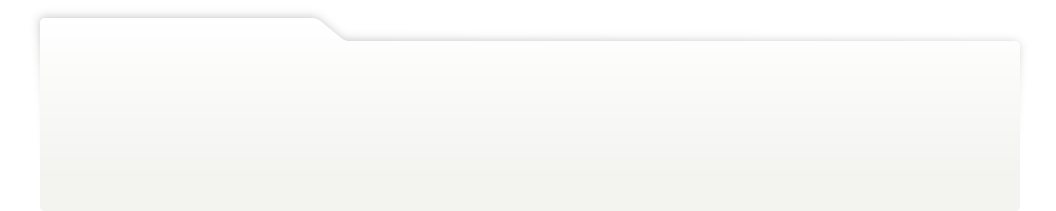
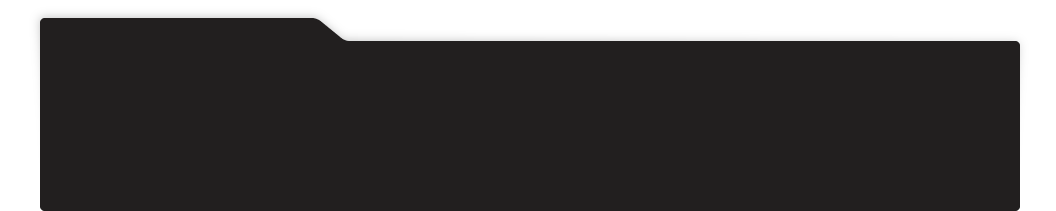
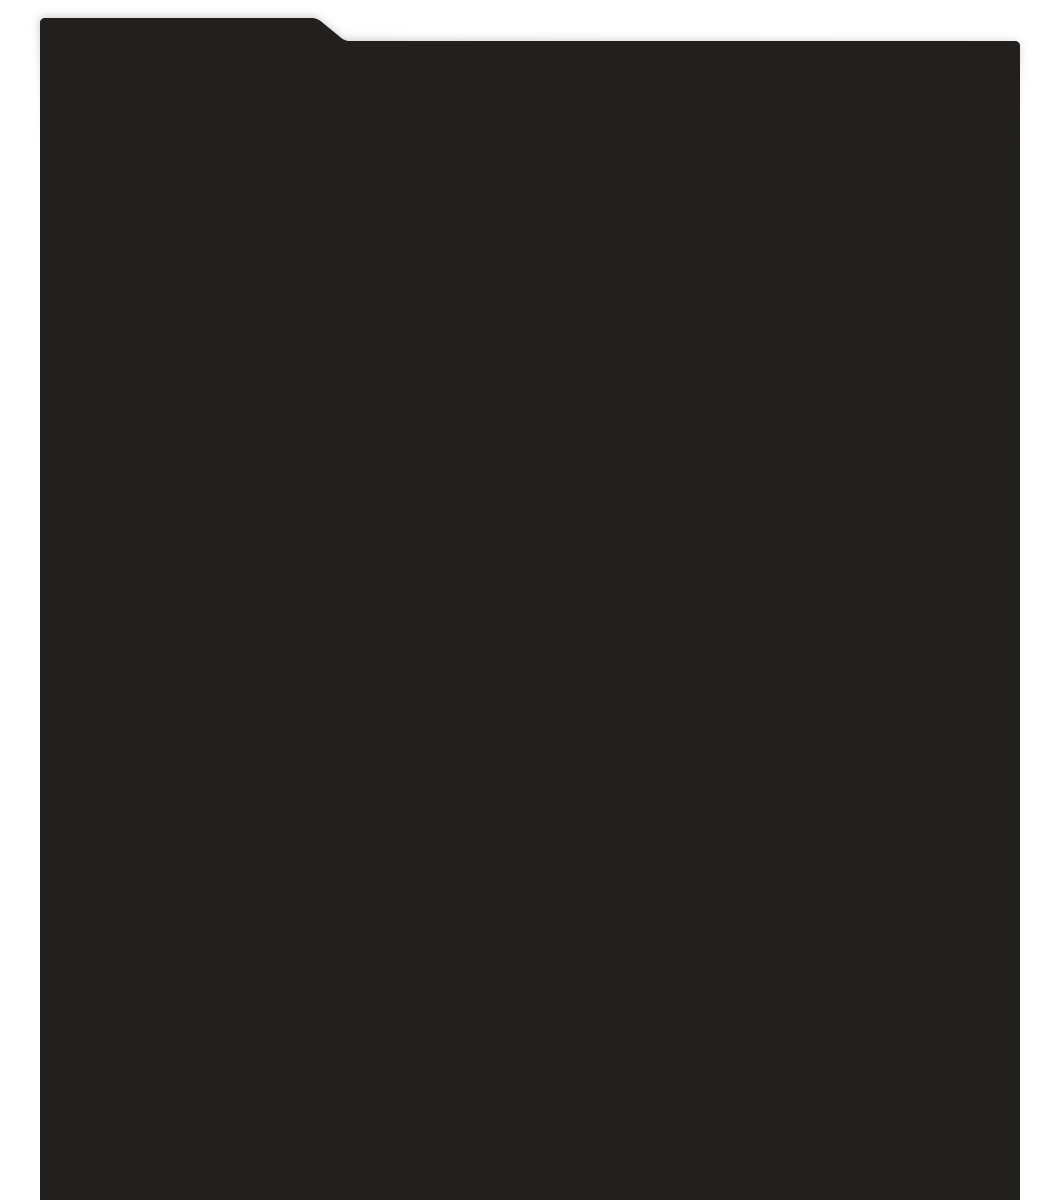
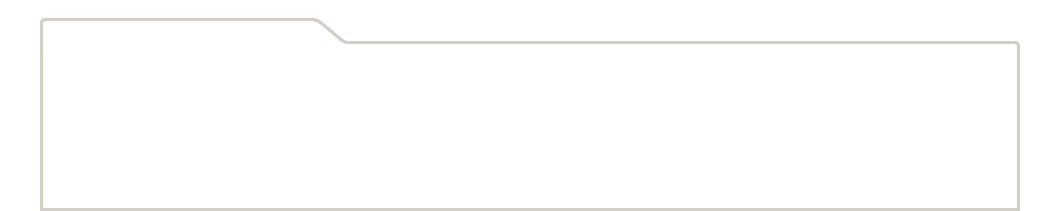
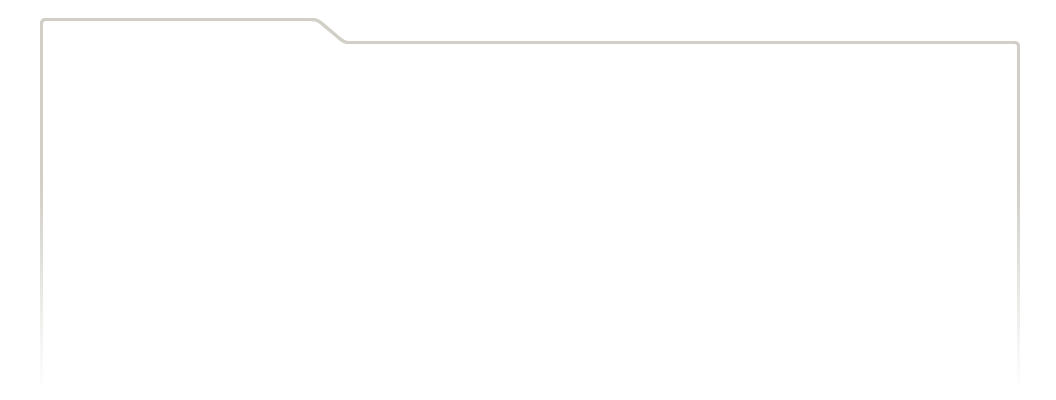
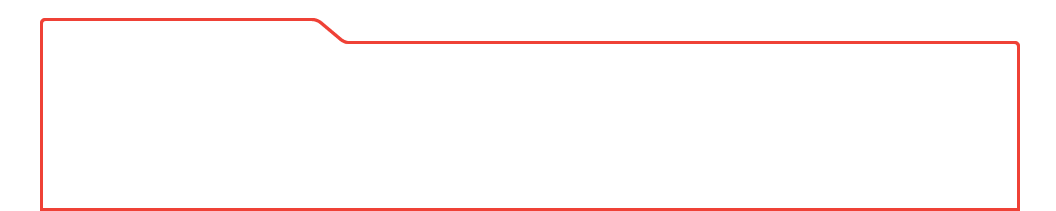
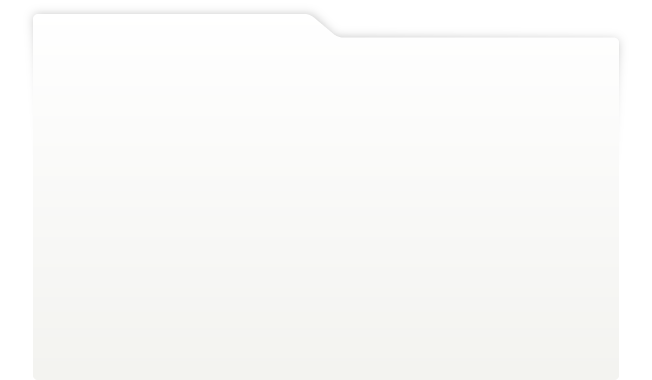
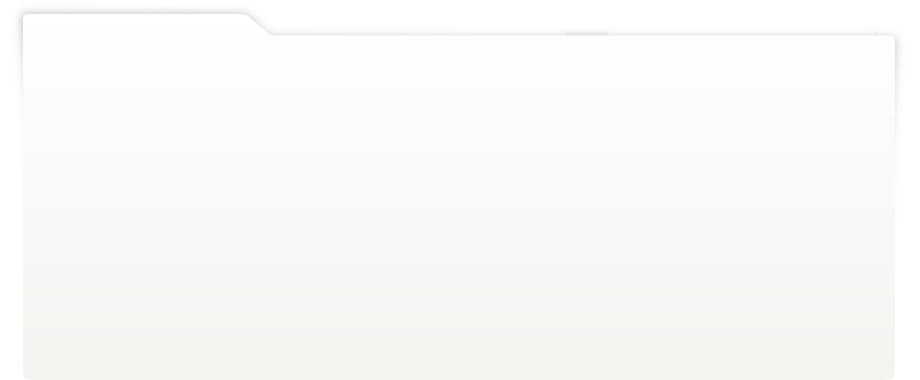
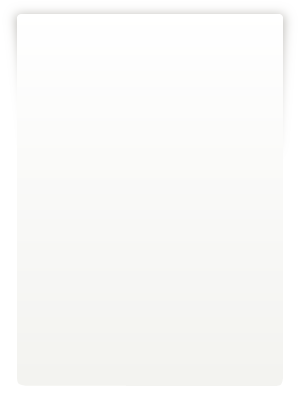
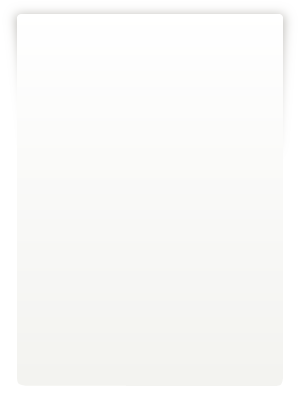
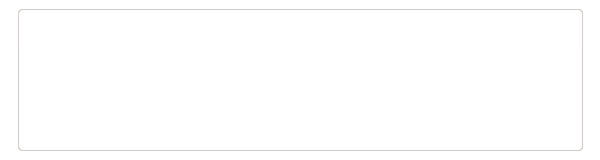
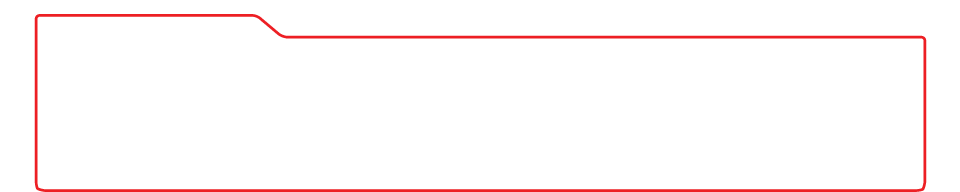
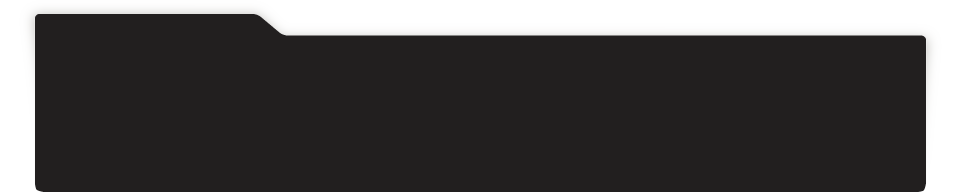
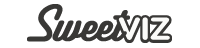
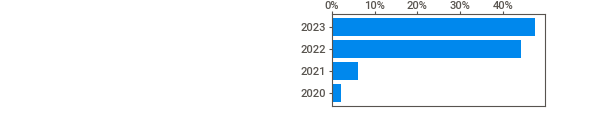
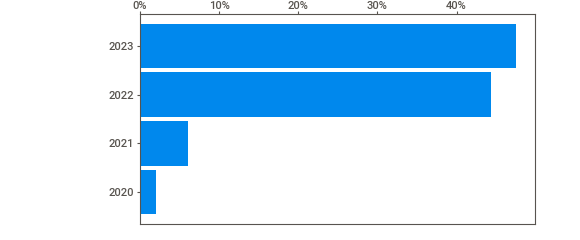
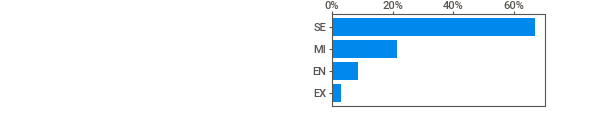
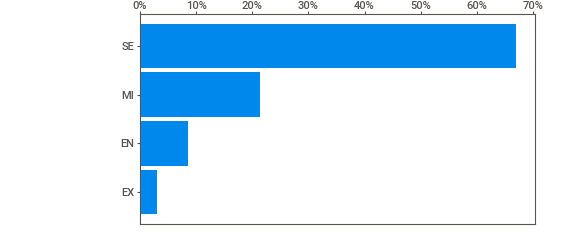
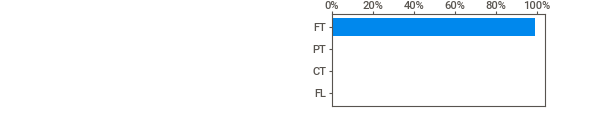
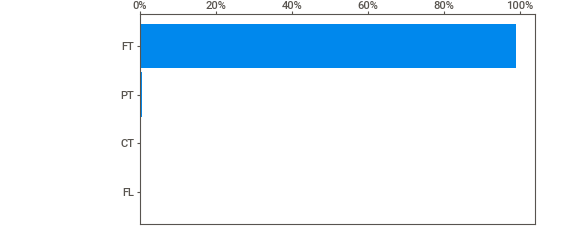
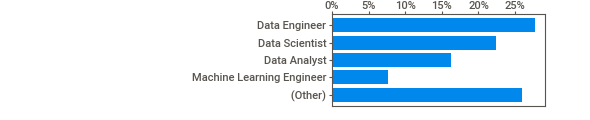
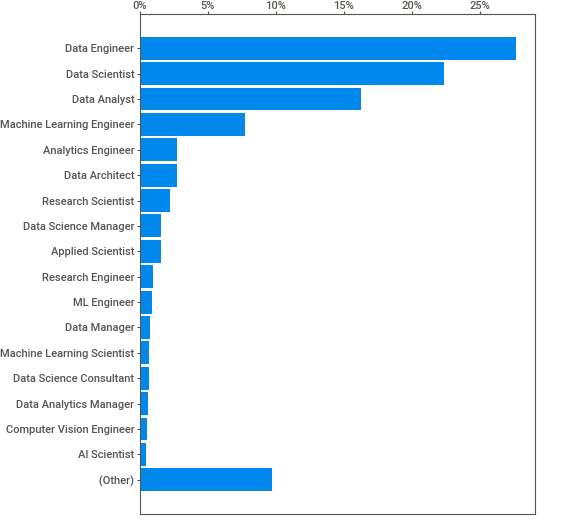
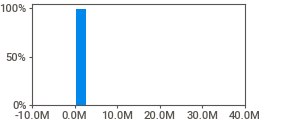
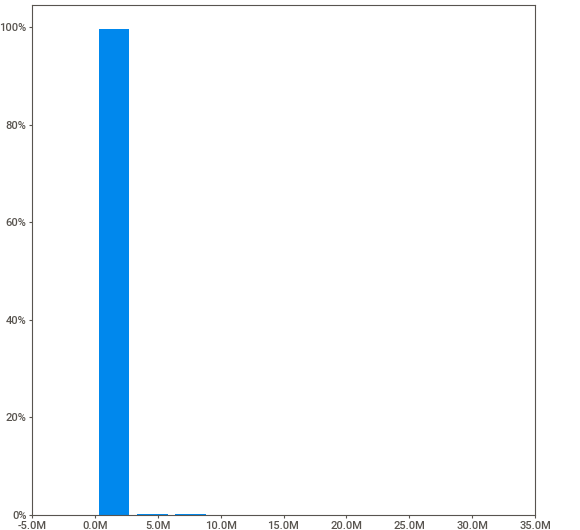
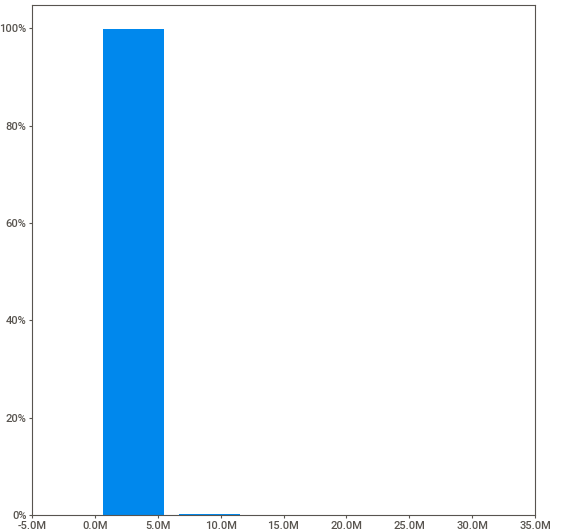
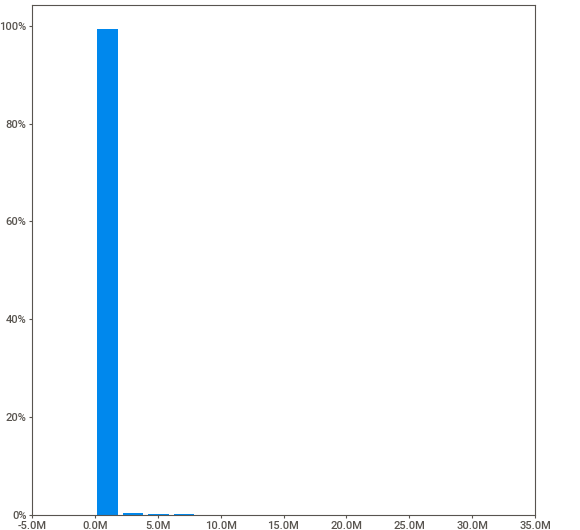
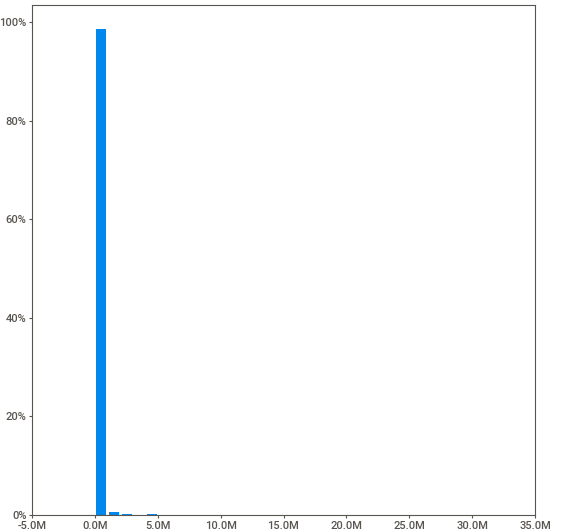
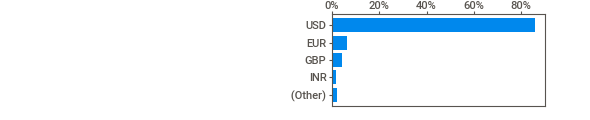
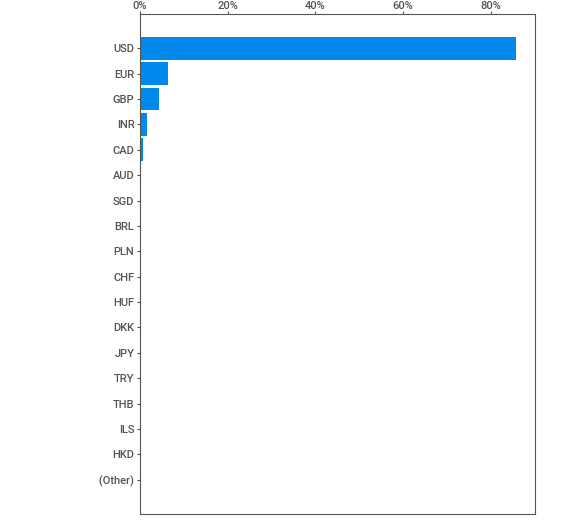
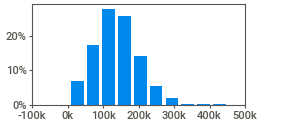
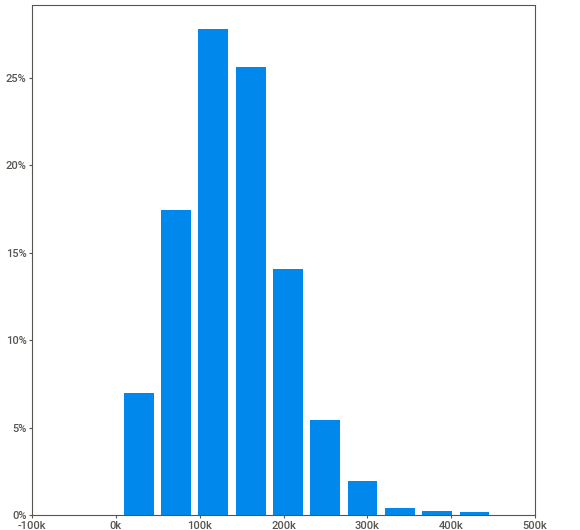
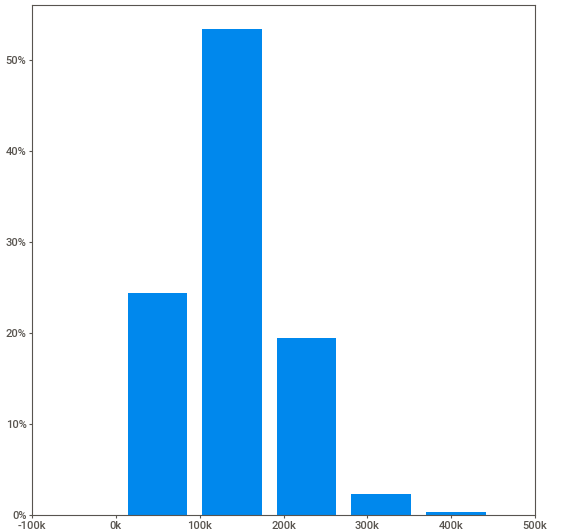
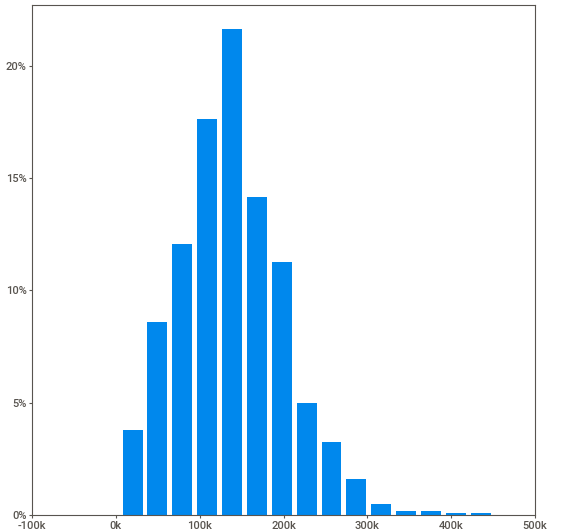
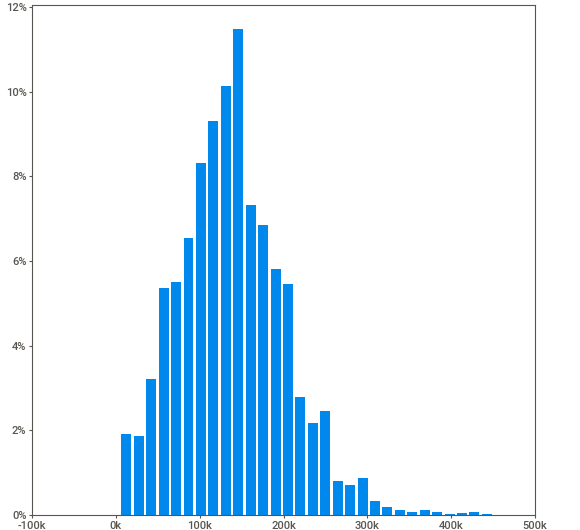
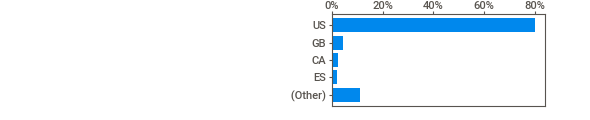
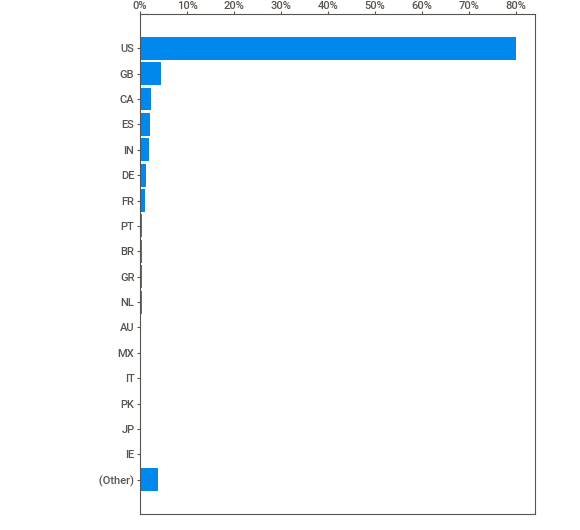
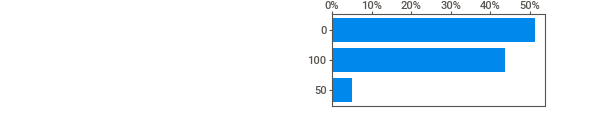
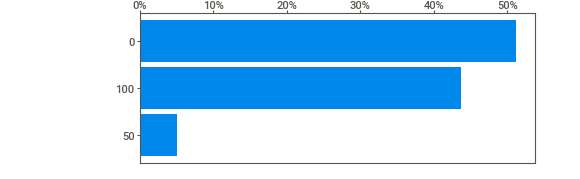
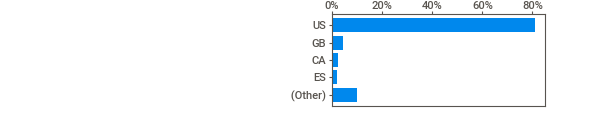
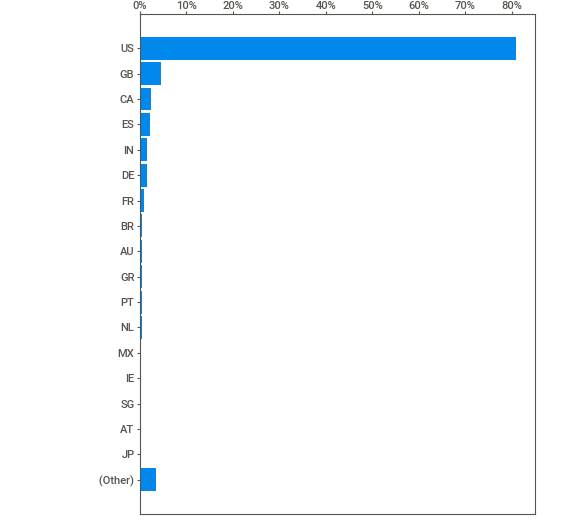
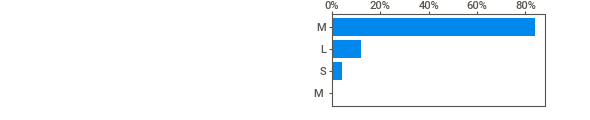
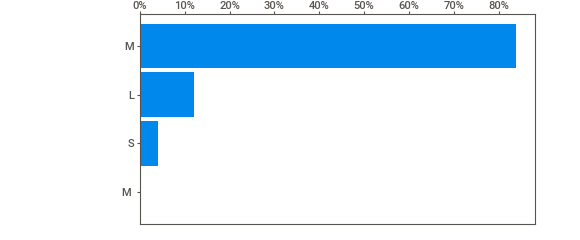
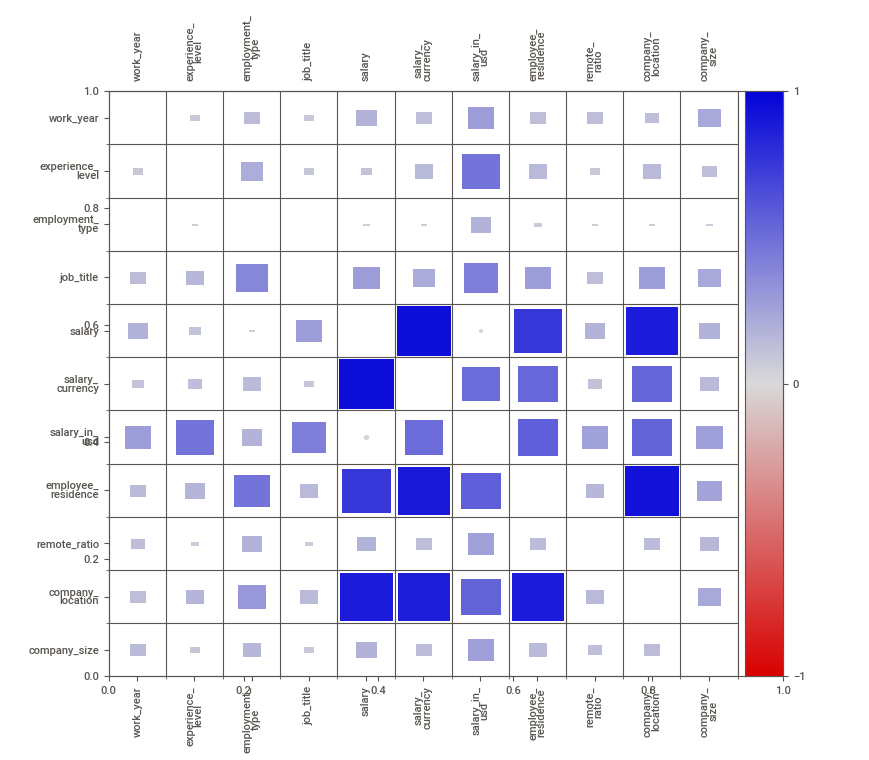
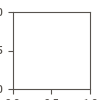

In [ ]:
import sweetviz as sv
import pandas as pd


report = sv.analyze(df)
report.show_html(filepath='ds_salaries.html')
report.show_notebook()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le 


In [ ]:
df_encoded

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,3
2,2023,2,0,66,25500,19,25500,75,100,70,3
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,2,47,412000,19,412000,75,100,70,0
3751,2021,2,2,84,151000,19,151000,75,100,70,0
3752,2020,0,2,47,105000,19,105000,75,100,70,3
3753,2020,0,0,17,100000,19,100000,75,100,70,0


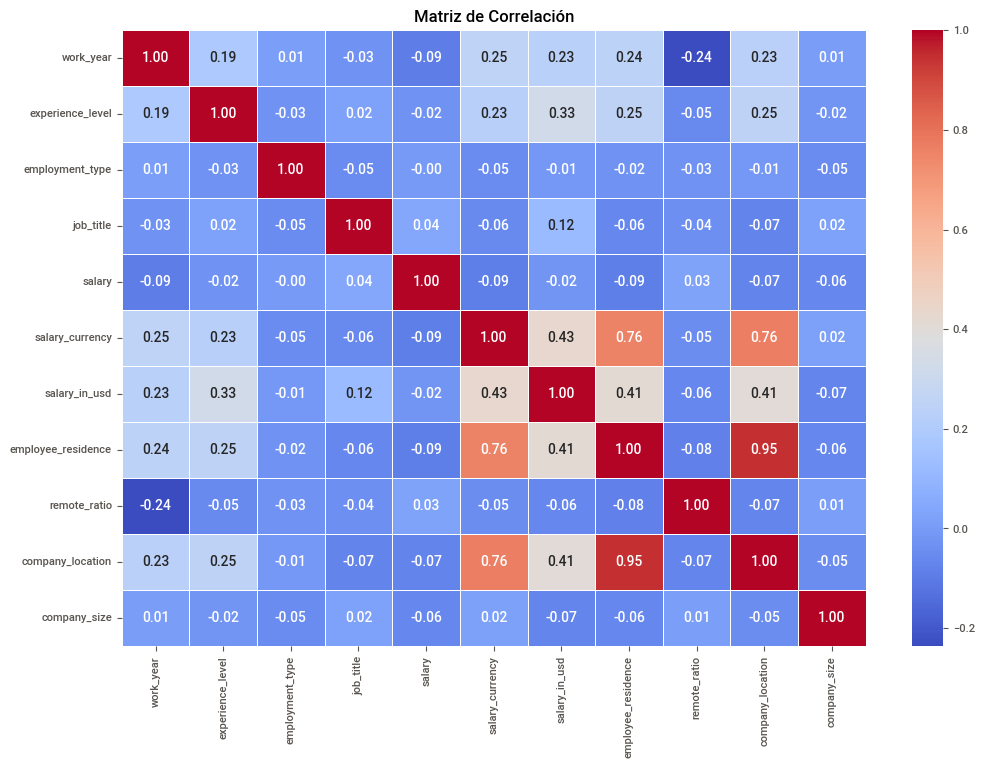

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_encoded.corr()
# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

